<a href="https://colab.research.google.com/github/yamaguchinorimitsu/ajax_app/blob/master/%E3%82%B9%E3%83%83%E3%82%AD%E3%83%AA%E6%A9%9F%E6%A2%B0%E7%AC%AC14%E7%AB%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv('/content/Boston.csv') # csvの読み込み
df.head(2) # 先頭2行の表示

,CRIME,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,high,0.0,18.10,0,0.718,3.561,87.9,1.6132,24.0,666,20.2,354.7,7.12,27.5
1,low,0.0,8.14,0,0.538,5.950,82.0,3.9900,4.0,307,21.0,232.6,27.71,13.2


In [2]:
df2 = df.fillna(df.mean( )) # 列ごとの平均値で欠損値の穴埋め

<ipython-input-2-44901f642b7f>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2 = df.fillna(df.mean( )) # 列ごとの平均値で欠損値の穴埋め


In [3]:
dummy = pd.get_dummies(df2['CRIME'], drop_first = True)
df3 = df2.join(dummy) # df2とdummyを列方向に結合
df3 = df3.drop(['CRIME'], axis = 1) # 元のCRIMEを削除

df3.head(2)

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,low,very_low
0,0.0,18.10,0,0.718,3.561,87.9,1.6132,24.0,666,20.2,354.7,7.12,27.5,0,0
1,0.0,8.14,0,0.538,5.950,82.0,3.9900,4.0,307,21.0,232.6,27.71,13.2,1,0


In [7]:
from sklearn.preprocessing import StandardScaler
 # 中身が整数だと、fit_transformで警告になるので、
# float型に変換（省略可能）
df4 = df3.astype('float')
# 標準化
sc = StandardScaler()
sc_df = sc.fit_transform(df4)

PCA(n_components=2, whiten=True)

In [9]:
from sklearn.decomposition import PCA
model = PCA(n_components = 2, whiten = True) # モデル作成

In [10]:
model.fit(sc_df)

PCA(n_components=2, whiten=True)

In [11]:
# 新規の第１軸（第１主成分とも呼ぶ）の固有ベクトル
print( model.components_[0] )
print('-----')
# 新規の第2軸（第2主成分とも呼ぶ）の固有ベクトル
print(model.components_[1])

[-0.2258543   0.35923465  0.04220985  0.3499321  -0.19485285  0.29792086
 -0.29980115  0.30726517  0.32822012  0.16246983 -0.18251937  0.27543839
 -0.2018449   0.03831172 -0.31492126]
-----
[-0.1533893   0.02835867  0.19795373  0.13817925  0.4047141   0.20058802
 -0.29340246 -0.1027543  -0.11546952 -0.34046929  0.05661836 -0.17845386
  0.44390529  0.42253976 -0.27716437]


In [12]:
new = model.transform(sc_df)

new_df = pd.DataFrame(new)
new_df.head(3)

,0,1
0,1.490417,-0.680415
1,0.703223,-0.252517
2,-1.403756,-0.613175


In [13]:
new_df.columns = ['PC1', 'PC2']
# 標準化済の既存データ（numpy)をデータフレーム化
df5 = pd.DataFrame(sc_df, columns = df4.columns)
# 2つのデータフレームを列方向に結合
df6 = pd.concat([df5, new_df], axis=1)

In [14]:
df_corr = df6.corr() # 相関係数の計算
df_corr.loc[:'very_low', 'PC1':]

,PC1,PC2
ZN,-0.560802,-0.226097
INDUS,0.891989,0.041801
CHAS,0.104808,0.291786
NOX,0.868891,0.203678
RM,-0.483825,0.596553
AGE,0.739745,0.295669
DIS,-0.744414,-0.432478
RAD,0.762947,-0.151461
TAX,0.814979,-0.170203
PTRATIO,0.403417,-0.501855


In [15]:
# わかりやすいように変数に代入
pc_corr = df_corr.loc[:'very_low', 'PC1':]

pc_corr['PC1'].sort_values(ascending = False)

INDUS       0.891989
NOX         0.868891
TAX         0.814979
RAD         0.762947
AGE         0.739745
LSTAT       0.683921
PTRATIO     0.403417
CHAS        0.104808
low         0.095129
B          -0.453200
RM         -0.483825
PRICE      -0.501186
ZN         -0.560802
DIS        -0.744414
very_low   -0.781958
Name: PC1, dtype: float64

In [16]:
pc_corr['PC2'].sort_values(ascending = False)

PRICE       0.654321
low         0.622828
RM          0.596553
AGE         0.295669
CHAS        0.291786
NOX         0.203678
B           0.083456
INDUS       0.041801
RAD        -0.151461
TAX        -0.170203
ZN         -0.226097
LSTAT      -0.263043
very_low   -0.408543
DIS        -0.432478
PTRATIO    -0.501855
Name: PC2, dtype: float64

<Axes: xlabel='City', ylabel='Exclusive residential'>

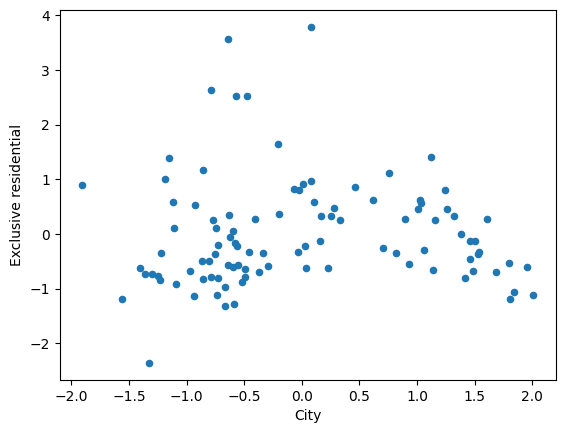

In [17]:
#都市の発展度合いと住環境の良さ
col = ['City', 'Exclusive residential']

new_df.columns = col # 列名の変更

new_df.plot(kind = 'scatter', x = 'City',
    y = 'Exclusive residential') # 散布図